In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,12249.000000,12251.000000,12256.000000,12257.000000,12257.000000,12259.000000,12259.000000,12259.000000,12250.000000,12255.000000,12259.000000,12259.000000
mean,7.267859,0.342542,0.319539,5.394036,0.056646,30.301615,114.977037,0.994790,3.220663,0.533571,10.471456,5.815401
std,1.306289,0.167280,0.147022,4.747832,0.035547,17.712035,57.355086,0.002982,0.161589,0.150508,1.185586,0.879103
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.500000,0.230000,0.250000,1.800000,0.038000,17.000000,74.000000,0.992435,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,2.900000,0.048000,29.000000,118.000000,0.995000,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.400000,8.000000,0.067000,41.000000,156.000000,0.997010,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12259 entries, 0 to 12258
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  12259 non-null  object 
 1   fixed acidity         12249 non-null  float64
 2   volatile acidity      12251 non-null  float64
 3   citric acid           12256 non-null  float64
 4   residual sugar        12257 non-null  float64
 5   chlorides             12257 non-null  float64
 6   free sulfur dioxide   12259 non-null  float64
 7   total sulfur dioxide  12259 non-null  float64
 8   density               12259 non-null  float64
 9   pH                    12250 non-null  float64
 10  sulphates             12255 non-null  float64
 11  alcohol               12259 non-null  float64
 12  quality               12259 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
#On retire le null
df = df.dropna(how='any',axis=0) 
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12225 entries, 0 to 12258
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  12225 non-null  object 
 1   fixed acidity         12225 non-null  float64
 2   volatile acidity      12225 non-null  float64
 3   citric acid           12225 non-null  float64
 4   residual sugar        12225 non-null  float64
 5   chlorides             12225 non-null  float64
 6   free sulfur dioxide   12225 non-null  float64
 7   total sulfur dioxide  12225 non-null  float64
 8   density               12225 non-null  float64
 9   pH                    12225 non-null  float64
 10  sulphates             12225 non-null  float64
 11  alcohol               12225 non-null  float64
 12  quality               12225 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.3+ MB


/home/jbdumaine/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

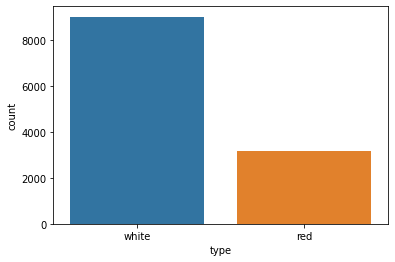

In [7]:
sns.countplot(df['type'])

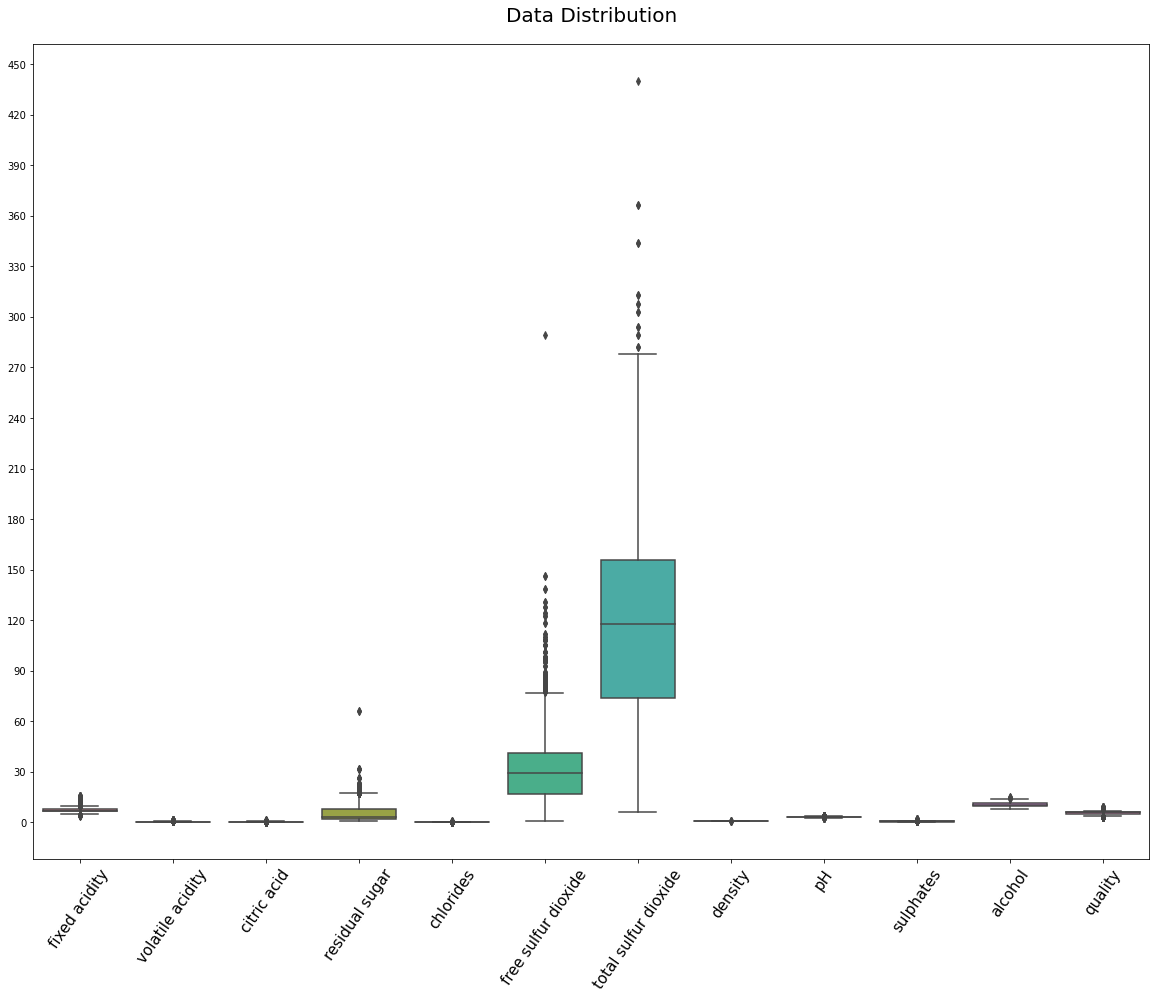

In [8]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

In [9]:
#On peut voir qu'il va falloir traiter les valeurs aberrantes pour le sucre et le sulfur dioxide. Retirons les
#Les deux approches les plus utilisées pour exclure les données aberrantes sont la méthode de césure (ou tronquage) et de Winsorising.
#print(df['residual sugar'].quantile(0.10))
#print(df['residual sugar'].quantile(0.90))
cols = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide']
for c in cols:
    #df[c] = np.where(df[c] < df[c].quantile(0.10), 2960.0,df[c])
    #df[c] = np.where(df[c] > df[c].quantile(0.90), 12681.0,df[c])
    #upper_level = df[c].mean() + 3*df[c].std()
    #lower_level = df[c].mean() - 3*df[c].std()
    #df.loc[(df[c] > upper_level ) | (df[c] < lower_level),c] = df[c].median()
    upper_level = df[c].mean() + 3*df[c].std()
    lower_level = df[c].mean() - 3*df[c].std()
    df = df[(df[c] > lower_level) & (df[c] < upper_level)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12094 entries, 1 to 12258
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  12094 non-null  object 
 1   fixed acidity         12094 non-null  float64
 2   volatile acidity      12094 non-null  float64
 3   citric acid           12094 non-null  float64
 4   residual sugar        12094 non-null  float64
 5   chlorides             12094 non-null  float64
 6   free sulfur dioxide   12094 non-null  float64
 7   total sulfur dioxide  12094 non-null  float64
 8   density               12094 non-null  float64
 9   pH                    12094 non-null  float64
 10  sulphates             12094 non-null  float64
 11  alcohol               12094 non-null  float64
 12  quality               12094 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.3+ MB


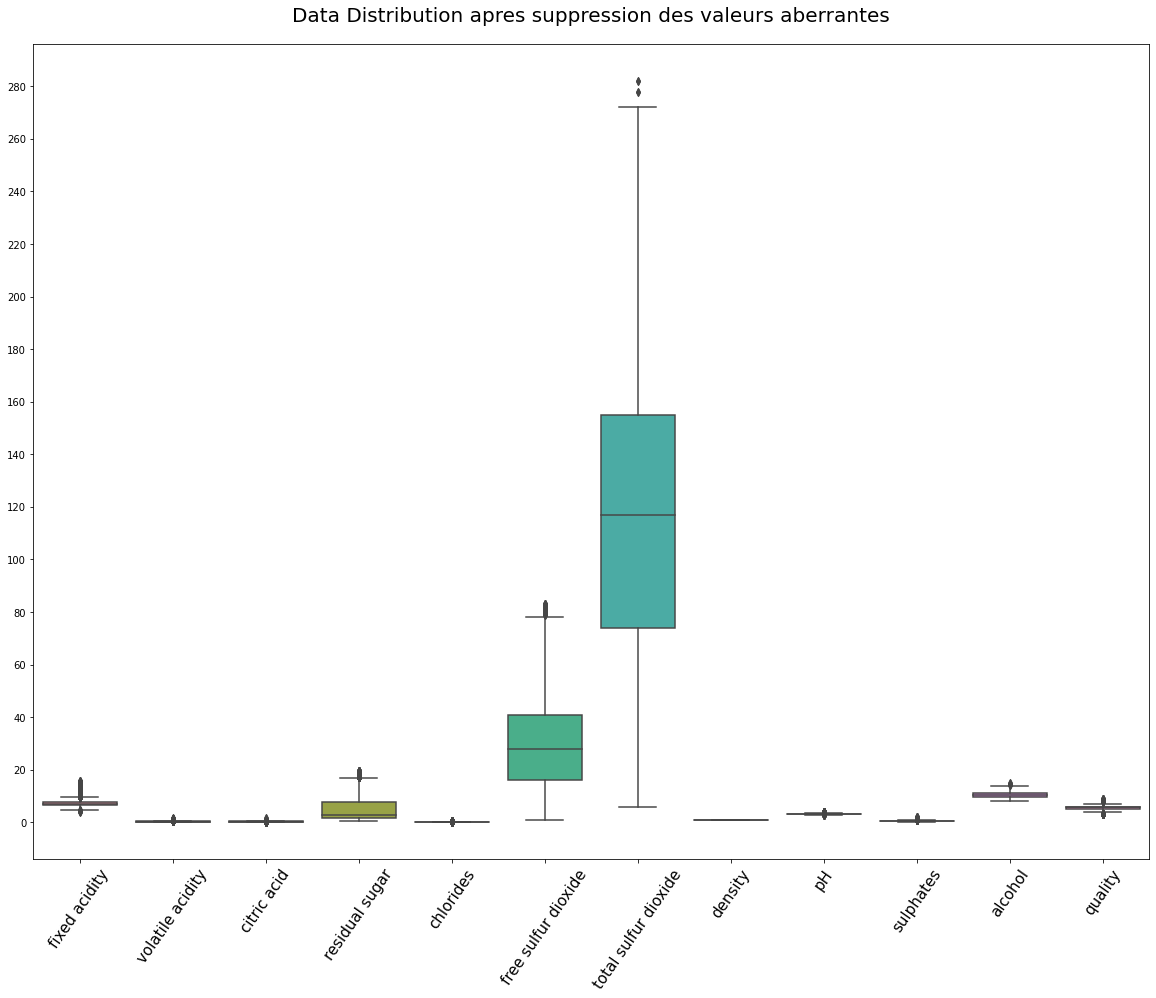

In [10]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df)
plt.yticks(range(0,300,20))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution apres suppression des valeurs aberrantes', size=20, y=1.02)
plt.show()

/home/jbdumaine/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


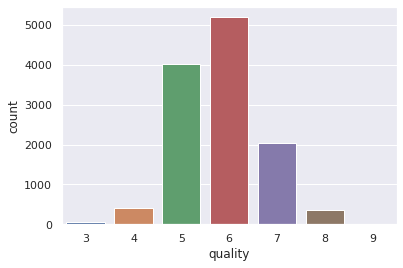

In [11]:
sns.set(style="darkgrid")
sns.countplot(df["quality"],data=df)
plt.show()

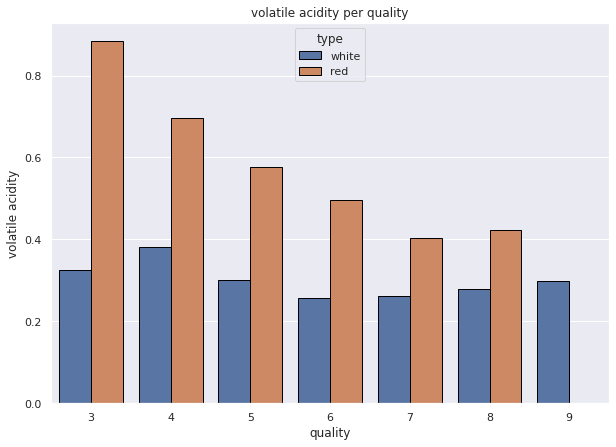

In [12]:
plt.figure(figsize=(10,7))
sns.barplot(y="volatile acidity", x='quality', data=df, hue='type', edgecolor='black', ci=None)
plt.title('volatile acidity per quality')
plt.show()

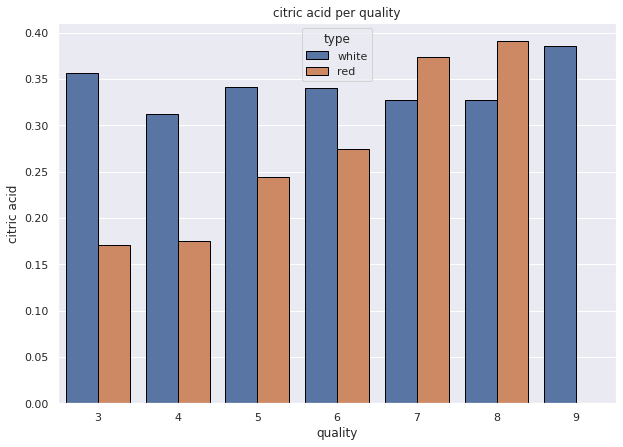

In [13]:
plt.figure(figsize=(10,7))
sns.barplot(y="citric acid", x='quality', data=df, hue='type', edgecolor='black', ci=None)
plt.title('citric acid per quality')
plt.show()

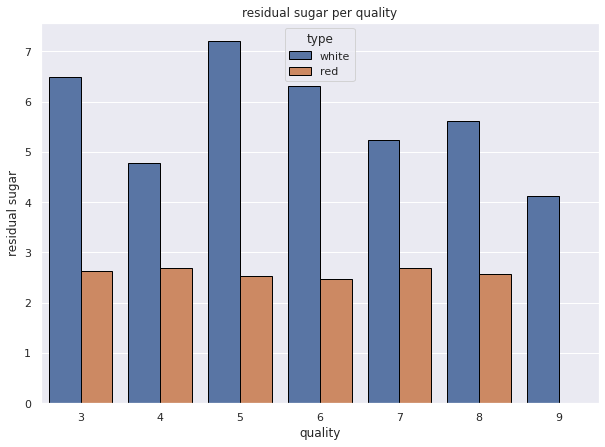

In [14]:
plt.figure(figsize=(10,7))
sns.barplot(y="residual sugar", x='quality', data=df, hue='type', edgecolor='black', ci=None)
plt.title('residual sugar per quality')
plt.show()

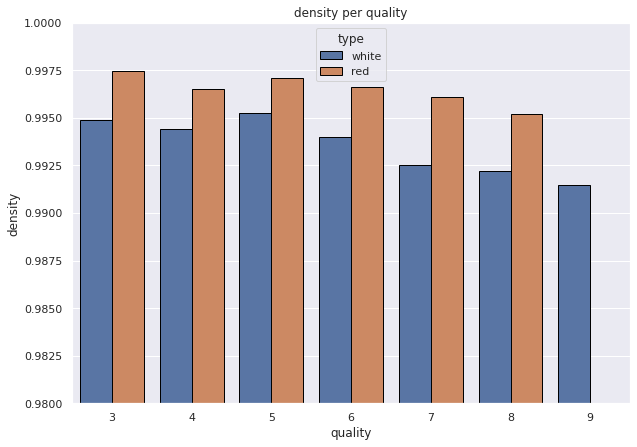

In [15]:
plt.figure(figsize=(10,7))
sns.barplot(y="density", x='quality', data=df, hue='type', edgecolor='black', ci=None)
plt.title('density per quality')
plt.ylim(0.98, 1.0)
plt.show()

<AxesSubplot:>

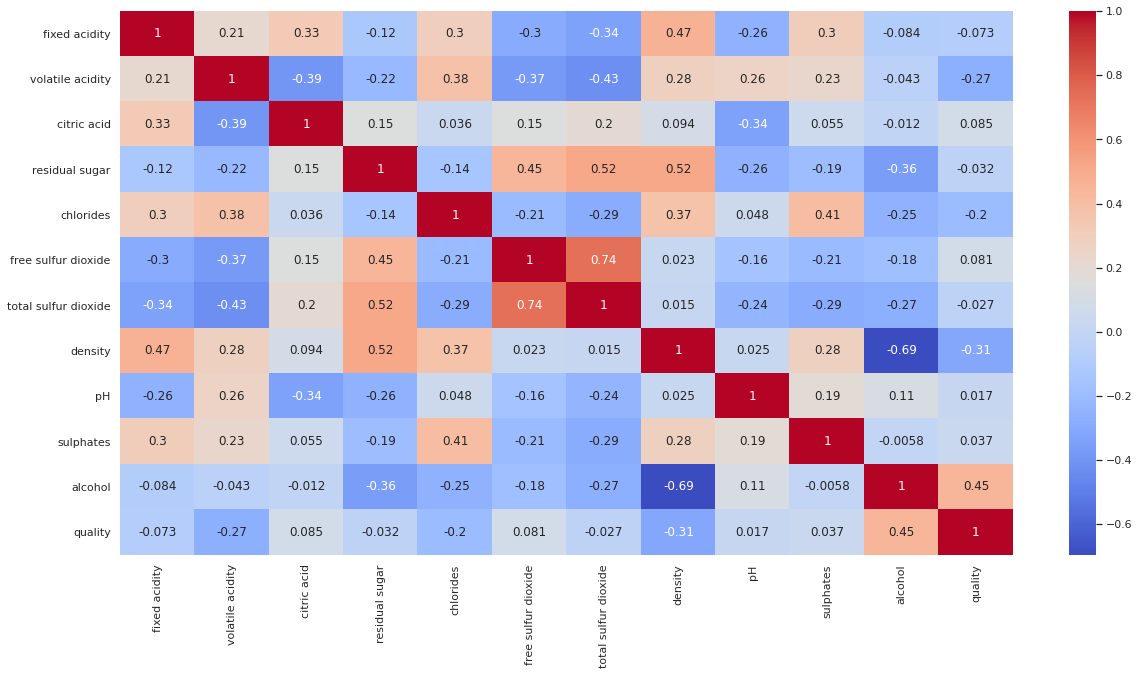

In [16]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [17]:
df.drop(df.loc[df['type']== "red"].index, inplace=True)
del df['type']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8904 entries, 1 to 10659
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         8904 non-null   float64
 1   volatile acidity      8904 non-null   float64
 2   citric acid           8904 non-null   float64
 3   residual sugar        8904 non-null   float64
 4   chlorides             8904 non-null   float64
 5   free sulfur dioxide   8904 non-null   float64
 6   total sulfur dioxide  8904 non-null   float64
 7   density               8904 non-null   float64
 8   pH                    8904 non-null   float64
 9   sulphates             8904 non-null   float64
 10  alcohol               8904 non-null   float64
 11  quality               8904 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 904.3 KB


In [18]:
from pycaret.classification import *
exp_name = setup(data = df,  target = 'quality')

,Description,Value
0,session_id,6758
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original Data,"(8904, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8753,0.8807,0.8184,0.8791,0.8741,0.8134,0.8153,0.9680
rf,Random Forest Classifier,0.8713,0.8754,0.8169,0.8752,0.8702,0.8075,0.8093,1.2760
lightgbm,Light Gradient Boosting Machine,0.8474,0.8514,0.8087,0.8515,0.8466,0.7718,0.7737,0.9980
dt,Decision Tree Classifier,0.8431,0.7981,0.8159,0.8447,0.8431,0.7698,0.7700,0.0690
gbc,Gradient Boosting Classifier,0.6499,0.7472,0.5963,0.6626,0.6413,0.4606,0.4678,6.9150
knn,K Neighbors Classifier,0.5682,0.6980,0.3160,0.5625,0.5623,0.3521,0.3533,0.1850
ridge,Ridge Classifier,0.5234,0.0000,0.2062,0.4969,0.4650,0.2180,0.2408,0.0370
lda,Linear Discriminant Analysis,0.5175,0.6405,0.2487,0.4952,0.4946,0.2440,0.2520,0.0510
lr,Logistic Regression,0.5170,0.6251,0.2117,0.4771,0.4759,0.2221,0.2355,3.4590
qda,Quadratic Discriminant Analysis,0.4872,0.6403,0.3120,0.4963,0.4814,0.2580,0.2618,0.0400


In [20]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9054,0.9833,0.8931,0.9084,0.9050,0.8591,0.8603
1,0.8686,0.9756,0.8926,0.8717,0.8686,0.8047,0.8058
2,0.8668,0.9712,0.7731,0.8767,0.8657,0.7986,0.8029
3,0.8716,0.9792,0.7210,0.8715,0.8694,0.8084,0.8092
4,0.8732,0.9817,0.8315,0.8751,0.8706,0.8105,0.8115
5,0.8684,0.9799,0.8657,0.8728,0.8671,0.8028,0.8050
6,0.8716,0.9753,0.7089,0.8759,0.8695,0.8067,0.8097
7,0.8684,0.0000,0.7786,0.8717,0.8673,0.8031,0.8044
8,0.8668,0.9780,0.8674,0.8736,0.8659,0.7999,0.8033
9,0.8925,0.9824,0.8518,0.8935,0.8921,0.8408,0.8410


In [21]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=6758, verbose=0,
                     warm_start=False)


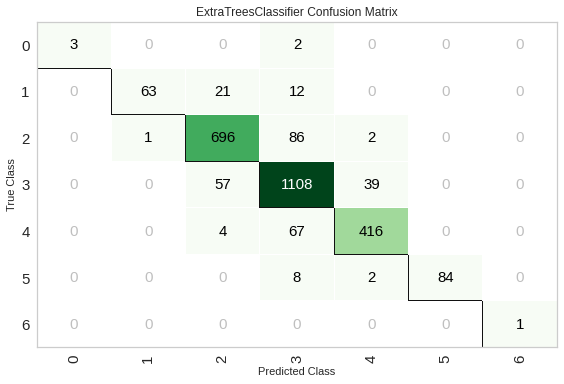

In [22]:
plot_model(et, plot = 'confusion_matrix')

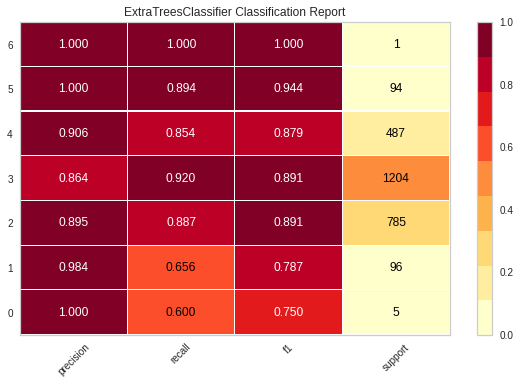

In [23]:
plot_model(et, plot = 'class_report')

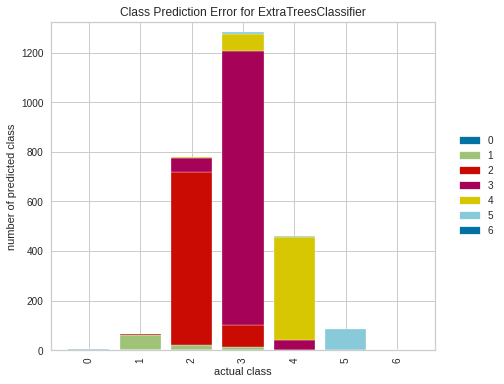

In [24]:
plot_model(et, plot = 'error')

In [27]:
et_final = finalize_model(et)
predict_model(et_final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.8,0.28,0.34,7.5,0.035,34.0,177.0,0.99692,3.33,0.43,9.10,5,5,1.0
1,7.3,0.18,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.40,6,6,1.0
2,7.7,0.26,0.32,1.2,0.040,26.0,117.0,0.99300,3.21,0.56,10.80,5,5,1.0
3,7.1,0.21,0.31,3.8,0.021,40.0,142.0,0.99215,3.17,0.39,10.80,7,7,1.0
4,6.8,0.36,0.32,1.6,0.039,10.0,124.0,0.99480,3.30,0.67,9.60,5,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,5.9,0.27,0.27,9.0,0.051,43.0,136.0,0.99410,3.25,0.53,10.70,6,6,1.0
2668,7.7,0.31,0.26,7.8,0.031,23.0,90.0,0.99440,3.13,0.50,10.40,5,5,1.0
2669,5.8,0.28,0.18,1.2,0.058,7.0,108.0,0.99288,3.23,0.58,9.55,4,4,1.0
2670,5.6,0.39,0.24,4.7,0.034,27.0,77.0,0.99060,3.28,0.36,12.70,5,5,1.0


In [28]:
#Regardons pour le Random Forest classifier
#https://miro.medium.com/max/640/1*PdwlCactbJf8F8C7sP-3gw.png (image pour folds)
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8910,0.9753,0.8860,0.8939,0.8907,0.8376,0.8389
1,0.8606,0.9721,0.8893,0.8649,0.8608,0.7923,0.7937
2,0.8587,0.9625,0.7690,0.8710,0.8579,0.7859,0.7912
3,0.8636,0.9711,0.7176,0.8642,0.8615,0.7961,0.7973
4,0.8652,0.9755,0.8273,0.8682,0.8627,0.7980,0.7996
5,0.8764,0.9763,0.8699,0.8804,0.8752,0.8150,0.8168
6,0.8700,0.9677,0.7081,0.8730,0.8678,0.8047,0.8071
7,0.8716,0.0000,0.7807,0.8741,0.8704,0.8082,0.8092
8,0.8668,0.9733,0.8704,0.8713,0.8665,0.8007,0.8027
9,0.8892,0.9798,0.8510,0.8903,0.8889,0.8361,0.8363


In [29]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=6758, verbose=0,
                       warm_start=False)


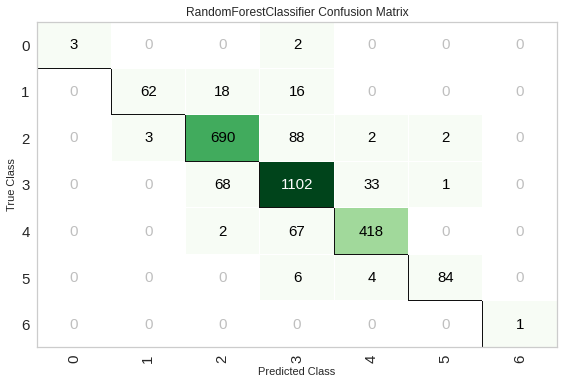

In [30]:
plot_model(rf, plot = 'confusion_matrix')

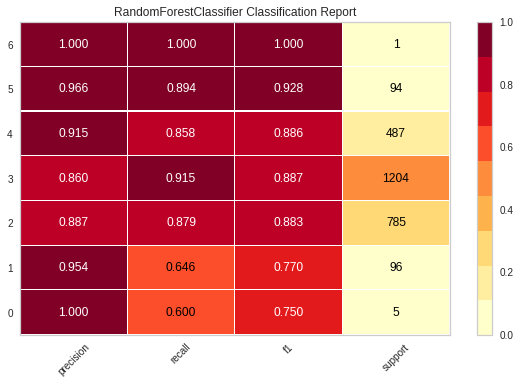

In [31]:
plot_model(rf, plot = 'class_report')

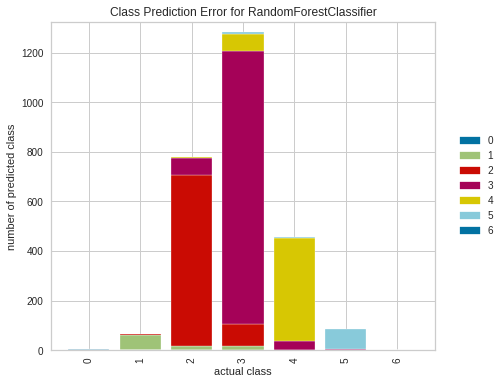

In [32]:
plot_model(rf, plot = 'error')

In [33]:
predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8832,0.9792,0.8274,0.8854,0.8825,0.8245,0.8253


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label,Score
0,6.8,0.28,0.34,7.5,0.035,34.0,177.0,0.99692,3.33,0.43,9.10,5,5,0.46
1,7.3,0.18,0.65,1.4,0.046,28.0,157.0,0.99460,3.33,0.62,9.40,6,6,0.99
2,7.7,0.26,0.32,1.2,0.040,26.0,117.0,0.99300,3.21,0.56,10.80,5,5,0.72
3,7.1,0.21,0.31,3.8,0.021,40.0,142.0,0.99215,3.17,0.39,10.80,7,7,0.73
4,6.8,0.36,0.32,1.6,0.039,10.0,124.0,0.99480,3.30,0.67,9.60,5,5,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,5.9,0.27,0.27,9.0,0.051,43.0,136.0,0.99410,3.25,0.53,10.70,6,6,0.89
2668,7.7,0.31,0.26,7.8,0.031,23.0,90.0,0.99440,3.13,0.50,10.40,5,5,0.71
2669,5.8,0.28,0.18,1.2,0.058,7.0,108.0,0.99288,3.23,0.58,9.55,4,5,0.51
2670,5.6,0.39,0.24,4.7,0.034,27.0,77.0,0.99060,3.28,0.36,12.70,5,5,0.69


In [43]:
print(df.iloc[3])
save_model(et_final, 'data/et_saved_07032020')
dt_saved = load_model('data/et_saved_07032020')

fixed acidity             7.2000
volatile acidity          0.2300
citric acid               0.3200
residual sugar            8.5000
chlorides                 0.0580
free sulfur dioxide      47.0000
total sulfur dioxide    186.0000
density                   0.9956
pH                        3.1900
sulphates                 0.4000
alcohol                   9.9000
quality                   6.0000
Name: 4, dtype: float64
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Successfully Loaded


In [59]:
X = df.drop(columns = ['quality'])
y = df['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)
#print(X_train.loc[8281])
values = [(6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4)]
test = pd.DataFrame(values,columns =['fixed acidity', 'volatile acidity', 
                         'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
                                             'density','pH','sulphates','alcohol'])
predict_model(dt_saved, data=test)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Label,Score
0,6.6,0.17,0.38,1.5,0.032,28,112,0.9914,3.25,0.55,11.4,7,1.0
